In [8]:
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pathlib import Path
import torch

In [151]:
Fs = 8000
mix = torch.from_numpy(np.random.randn(int(0.256*11.3*Fs)))
print(mix.shape)

duration = 0.256
frame_length = int(duration * Fs)
hop_length = frame_length//2

L = mix.shape[0]
pad = frame_length//2

mix = torch.concat([torch.zeros(pad), mix, torch.zeros(3*pad)])

mix = mix.numpy()
mix_frames = lb.util.frame(mix, frame_length=frame_length, hop_length=hop_length) # N frames x Len frames
T, N = mix_frames.shape
mix_frames = torch.Tensor(mix_frames.copy()).T # N frames x T frames
mix = torch.from_numpy(mix)
print(mix_frames.shape)

# windowing
win = torch.hann_window(frame_length, periodic=True)
mix_frames = mix_frames * win[None,:]

# OLA
ola_mix = torch.zeros((N-1)*hop_length + frame_length)
for n in range(N):
    ola_mix[hop_length*n:hop_length*n+T] += mix_frames[n,:]
    
L = min(ola_mix.shape[0], mix.shape[0])
print(L)
ola_mix = 

SyntaxError: invalid syntax (1707710245.py, line 32)

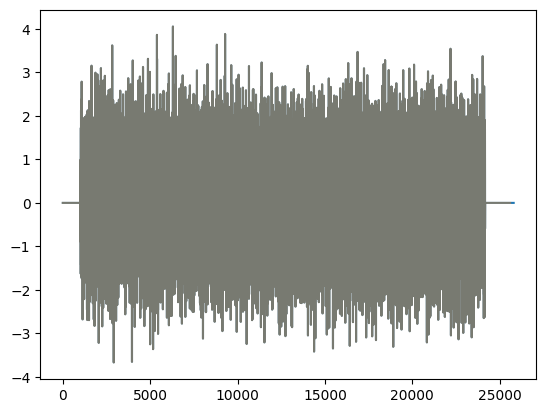

In [109]:
plt.plot(mix.numpy().T)
plt.plot(ola_mix.numpy().T, alpha=0.4)

In [111]:
plt.plot(torch.abs(ola_mix - mix).T)

RuntimeError: The size of tensor a (25600) must match the size of tensor b (25804) at non-singleton dimension 0

In [155]:
eye = np.eye(3, k=(0,1))
print(eye)

TypeError: '>=' not supported between instances of 'tuple' and 'int'

In [156]:
import scipy as sp

In [165]:
v = np.array([1,1,1,0,0])
1 - sp.linalg.toeplitz(v)

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0]])

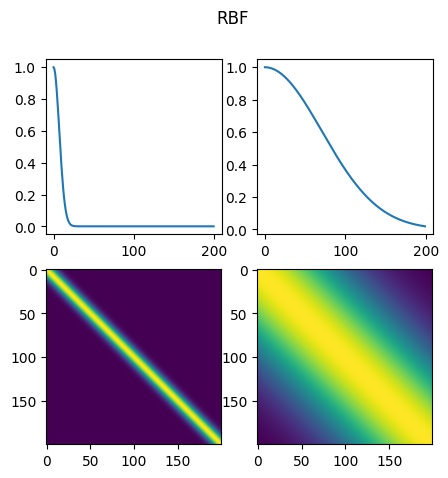

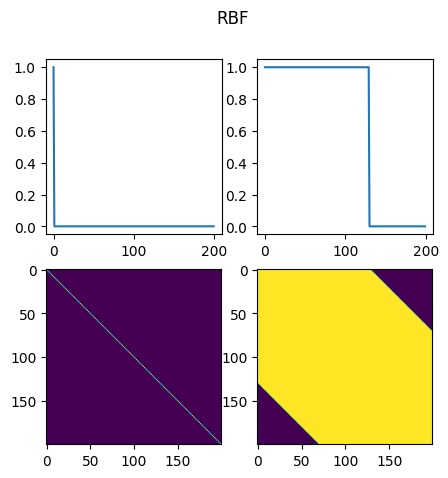

In [233]:
N = 200
support = np.arange(N)
row1 = np.exp(-support**2 / (10*N/200)**2)
row2 = np.exp(-support**2 / (0.5*N)**2)
toep1n = sp.linalg.toeplitz(row1)
toep2n = sp.linalg.toeplitz(row2)


plt.figure(figsize=(5,5))
plt.suptitle('RBF')
plt.subplot(221)
plt.plot(row1)
plt.subplot(222)
plt.plot(row2)
plt.subplot(223)
plt.imshow(toep1n)
plt.subplot(224)
plt.imshow(toep2n)
plt.show()

row1 = np.array(1*[1] + [0]*(N-1))
row2 = np.array(130*[1] + [0]*(N-130))
toep1i = sp.linalg.toeplitz(row1)
toep2i = sp.linalg.toeplitz(row2)

plt.figure(figsize=(5,5))
plt.suptitle('RBF')
plt.subplot(221)
plt.plot(row1)
plt.subplot(222)
plt.plot(row2)
plt.subplot(223)
plt.imshow(toep1i)
plt.subplot(224)
plt.imshow(toep2i)
plt.show()

200


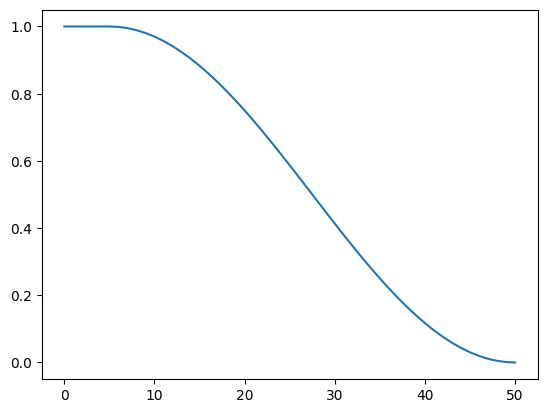

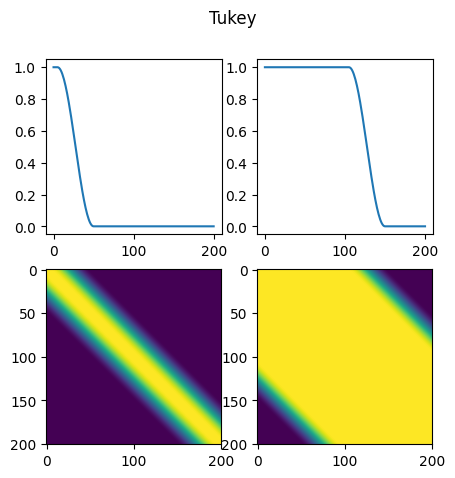

In [220]:
from scipy import signal
print(N)
window = signal.windows.tukey(101, alpha=0.9)

plt.plot(window[50:])
plt.show()


row1 = np.concatenate([np.ones(0), window[50:], np.zeros(N-50-0)])
row2 = np.concatenate([np.ones(100), window[50:], np.zeros(N-50-100)])

toep1t = sp.linalg.toeplitz(row1)
toep2t = sp.linalg.toeplitz(row2)

plt.figure(figsize=(5,5))
plt.suptitle('Tukey')
plt.subplot(221)
plt.plot(row1)
plt.subplot(222)
plt.plot(row2)
plt.subplot(223)
plt.imshow(toep1t)
plt.subplot(224)
plt.imshow(toep2t)
plt.show()

(200, 200)


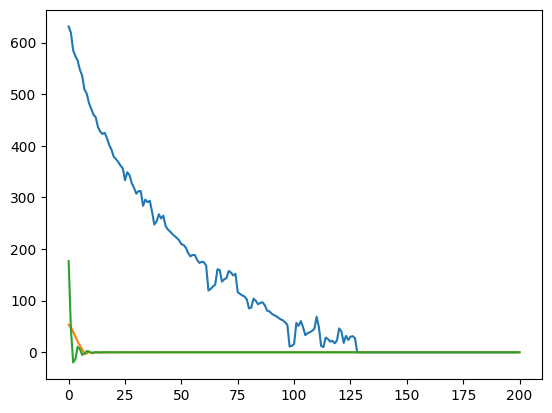

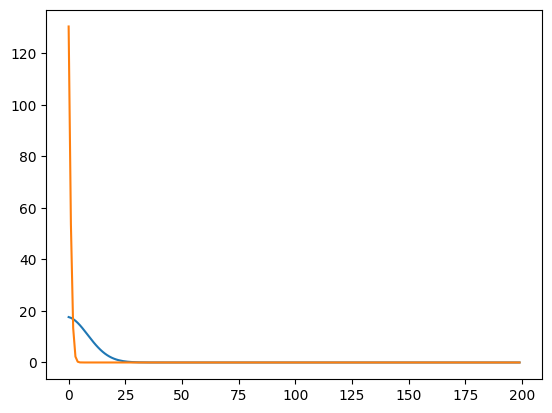

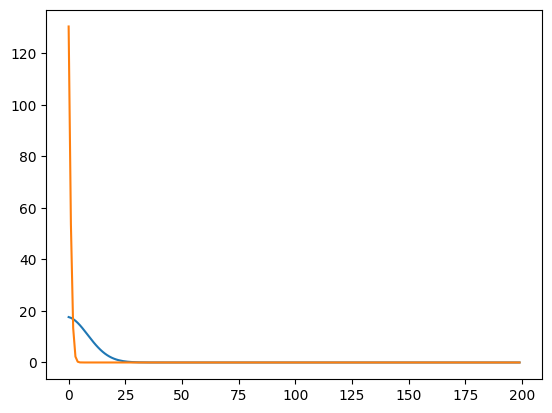

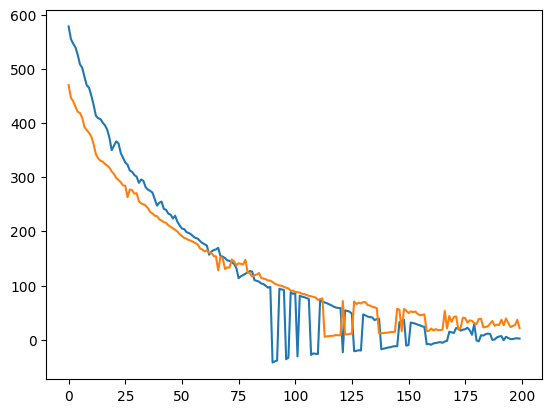

In [243]:
x = np.random.randn(N,128)

C = x @ x.T
print(C.shape)

plt.plot(np.linalg.eigvals(C).real)

Mt1 = toep1t
Mt2 = toep2t
plt.plot(np.linalg.eigvals(Mt1).real)
plt.plot(np.linalg.eigvals(Mt2).real)
plt.show()

Mn1 = toep1n
Mn2 = toep2n
plt.plot(np.linalg.eigvals(Mn1).real)
plt.plot(np.linalg.eigvals(Mn2).real)

plt.show()

Mi1 = toep1i
Mi2 = toep2i
plt.plot(np.linalg.eigvals(Mn1).real)
plt.plot(np.linalg.eigvals(Mn2).real)
plt.show()

plt.plot(np.linalg.eigvals(Mi2*C).real)
plt.plot(np.linalg.eigvals(Mn2*C).real)